[*********************100%***********************]  1 of 1 completed
Epoch 1/50
41/41 [==============================] - 2s 7ms/step - loss: 0.0070
Epoch 2/50
41/41 [==============================] - 0s 6ms/step - loss: 1.8685e-04
Epoch 3/50
41/41 [==============================] - 0s 7ms/step - loss: 5.2881e-05
Epoch 4/50
41/41 [==============================] - 0s 7ms/step - loss: 4.3018e-05
Epoch 5/50
41/41 [==============================] - 0s 7ms/step - loss: 4.0356e-05
Epoch 6/50
41/41 [==============================] - 0s 7ms/step - loss: 3.8696e-05
Epoch 7/50
41/41 [==============================] - 0s 7ms/step - loss: 4.0195e-05
Epoch 8/50
41/41 [==============================] - 0s 7ms/step - loss: 4.1357e-05
Epoch 9/50
41/41 [==============================] - 0s 6ms/step - loss: 3.8245e-05
Epoch 10/50
41/41 [==============================] - 0s 6ms/step - loss: 3.7301e-05
Epoch 11/50
41/41 [==============================] - 0s 6ms/step - loss: 3.6852e-05
Epoch 12/50
41/41 [=

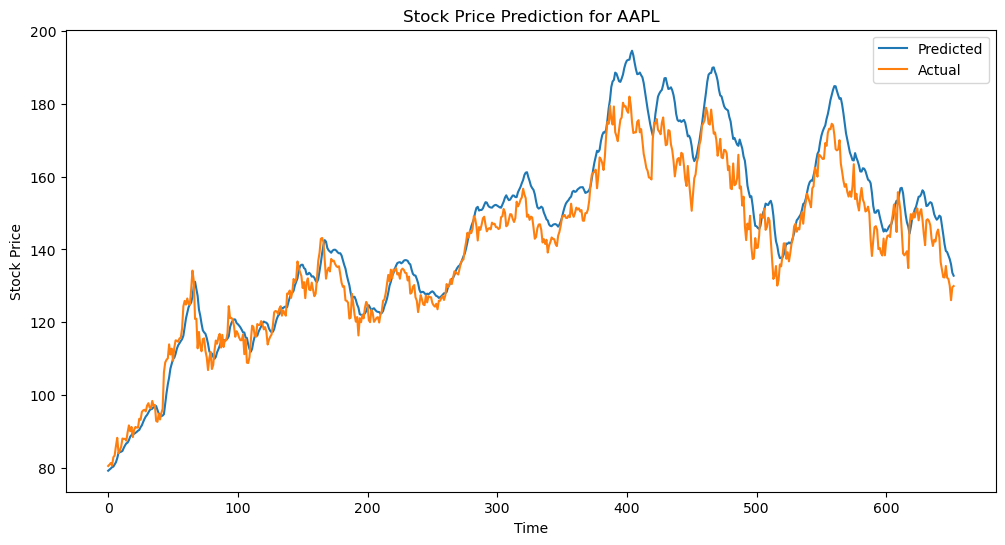

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Define the stock symbol and time range
stock_symbol = "AAPL"  # Apple Inc. as an example
start_date = "2010-01-01"
end_date = "2023-01-01"

# Fetch historical stock price data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Preprocessing
data['Date'] = data.index
data.reset_index(drop=True, inplace=True)

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create sequences
sequence_length = 10
sequences = []
next_price = []
for i in range(len(data_scaled) - sequence_length):
    sequences.append(data_scaled[i:i+sequence_length])
    next_price.append(data_scaled[i+sequence_length])

X = np.array(sequences)
y = np.array(next_price)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"MSE: {mse}")

# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform predictions for plotting
predicted_prices_inv = scaler.inverse_transform(predicted_prices)
actual_prices_inv = scaler.inverse_transform(y_test)

# Plot predicted vs. actual prices
plt.figure(figsize=(12, 6))
plt.plot(predicted_prices_inv, label='Predicted')
plt.plot(actual_prices_inv, label='Actual')
plt.legend()
plt.title(f'Stock Price Prediction for {stock_symbol}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()
